<a href="https://colab.research.google.com/github/elyysince7/5241project/blob/main/5241Project(EL%26KB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as smapi
import sklearn
from scipy.stats import shapiro
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, roc_curve, auc
)

# Data Collection


In [145]:
df = pd.read_csv('stroke_data.csv') # Import stroke data
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [146]:
df.shape #Number of rows and columns
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


# Data Cleaning

In [147]:
# Drop irrelevant column
df = df.drop(columns='id')

# Check the values in Gender column and drop the 'other' value
print(df['gender'].value_counts())
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

# Check unknown values in Smoking_status
print(df['smoking_status'].value_counts())
df = df[df['smoking_status'] != 'Unknown']
print(df['smoking_status'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
gender
Female    2994
Male      2115
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64
smoking_status
never smoked       1892
formerly smoked     884
smokes              789
Name: count, dtype: int64


In [148]:
# Drop "Unknown" values in smoking_status
df = df[df['smoking_status'] != 'Unknown']
print(df.count())

gender               3565
age                  3565
hypertension         3565
heart_disease        3565
ever_married         3565
work_type            3565
Residence_type       3565
avg_glucose_level    3565
bmi                  3425
smoking_status       3565
stroke               3565
dtype: int64


In [149]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64


In [150]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


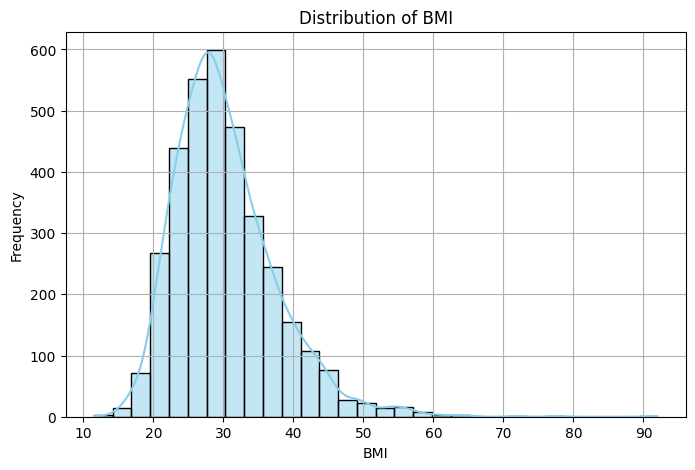

In [151]:
#check if BMI values is normally distributed
bmi_values = df['bmi'].dropna()
plt.figure(figsize=(8, 5))
sns.histplot(bmi_values, kde=True, bins=30, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
## data right-skewed, so not using mean imputation would be better

###Method: KNN Imputation

In [152]:
# Encode 'smoking_status' for all rows
df['smoking_status_encoded'] = LabelEncoder().fit_transform(df['smoking_status'].astype(str))

# Define columns for imputation
impute_cols = ['age', 'hypertension', 'heart_disease',
               'avg_glucose_level', 'bmi', 'smoking_status_encoded']

# Apply KNN Imputer separately for each gender
for gender in ['Female', 'Male']:
    gender_mask = df['gender'] == gender
    imputer = KNNImputer(n_neighbors=5)
    df.loc[gender_mask, impute_cols] = imputer.fit_transform(df.loc[gender_mask, impute_cols])

# Drop the temporary encoded column
df.drop(columns='smoking_status_encoded', inplace=True)
df.head(50)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.22,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.70,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.80,smokes,1


In [153]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [154]:
# Save clean dataset to CSV
df.to_csv("cleaned_stroke_dataset.csv", index=False)

from google.colab import files
files.download("processed_stroke_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

###Correlation Matrix

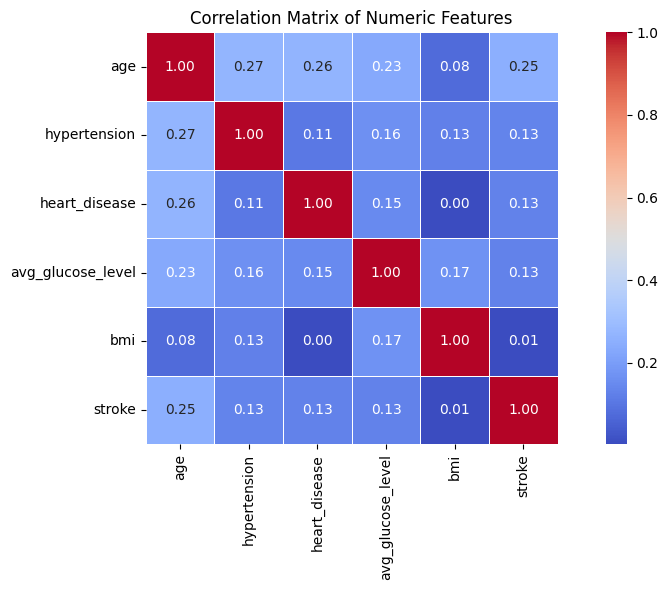

In [105]:
# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Addional EDA: Maybe

In [106]:
# Pairwise Correlation Analysis:

# Suppose df is your DataFrame
numeric_df = df.select_dtypes(include='number')

# Compute pairwise correlation matrix
corr_matrix = numeric_df.corr()

# Display top pairs (sorted by absolute value, excluding 1.0 diagonals)
import numpy as np

# Unstack and sort
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations (diagonal entries)
corr_pairs = corr_pairs[corr_pairs < 1]

# Optional: keep only top N most correlated pairs
top_pairs = corr_pairs.drop_duplicates().head(10)
print(top_pairs)

age                hypertension         0.269597
heart_disease      age                  0.264269
stroke             age                  0.250765
age                avg_glucose_level    0.233005
avg_glucose_level  bmi                  0.166964
                   hypertension         0.164658
heart_disease      avg_glucose_level    0.148286
hypertension       stroke               0.134695
stroke             heart_disease        0.129330
avg_glucose_level  stroke               0.128773
dtype: float64


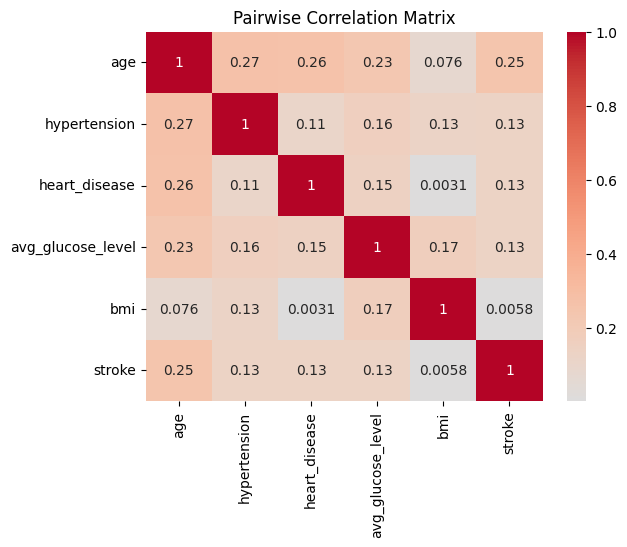

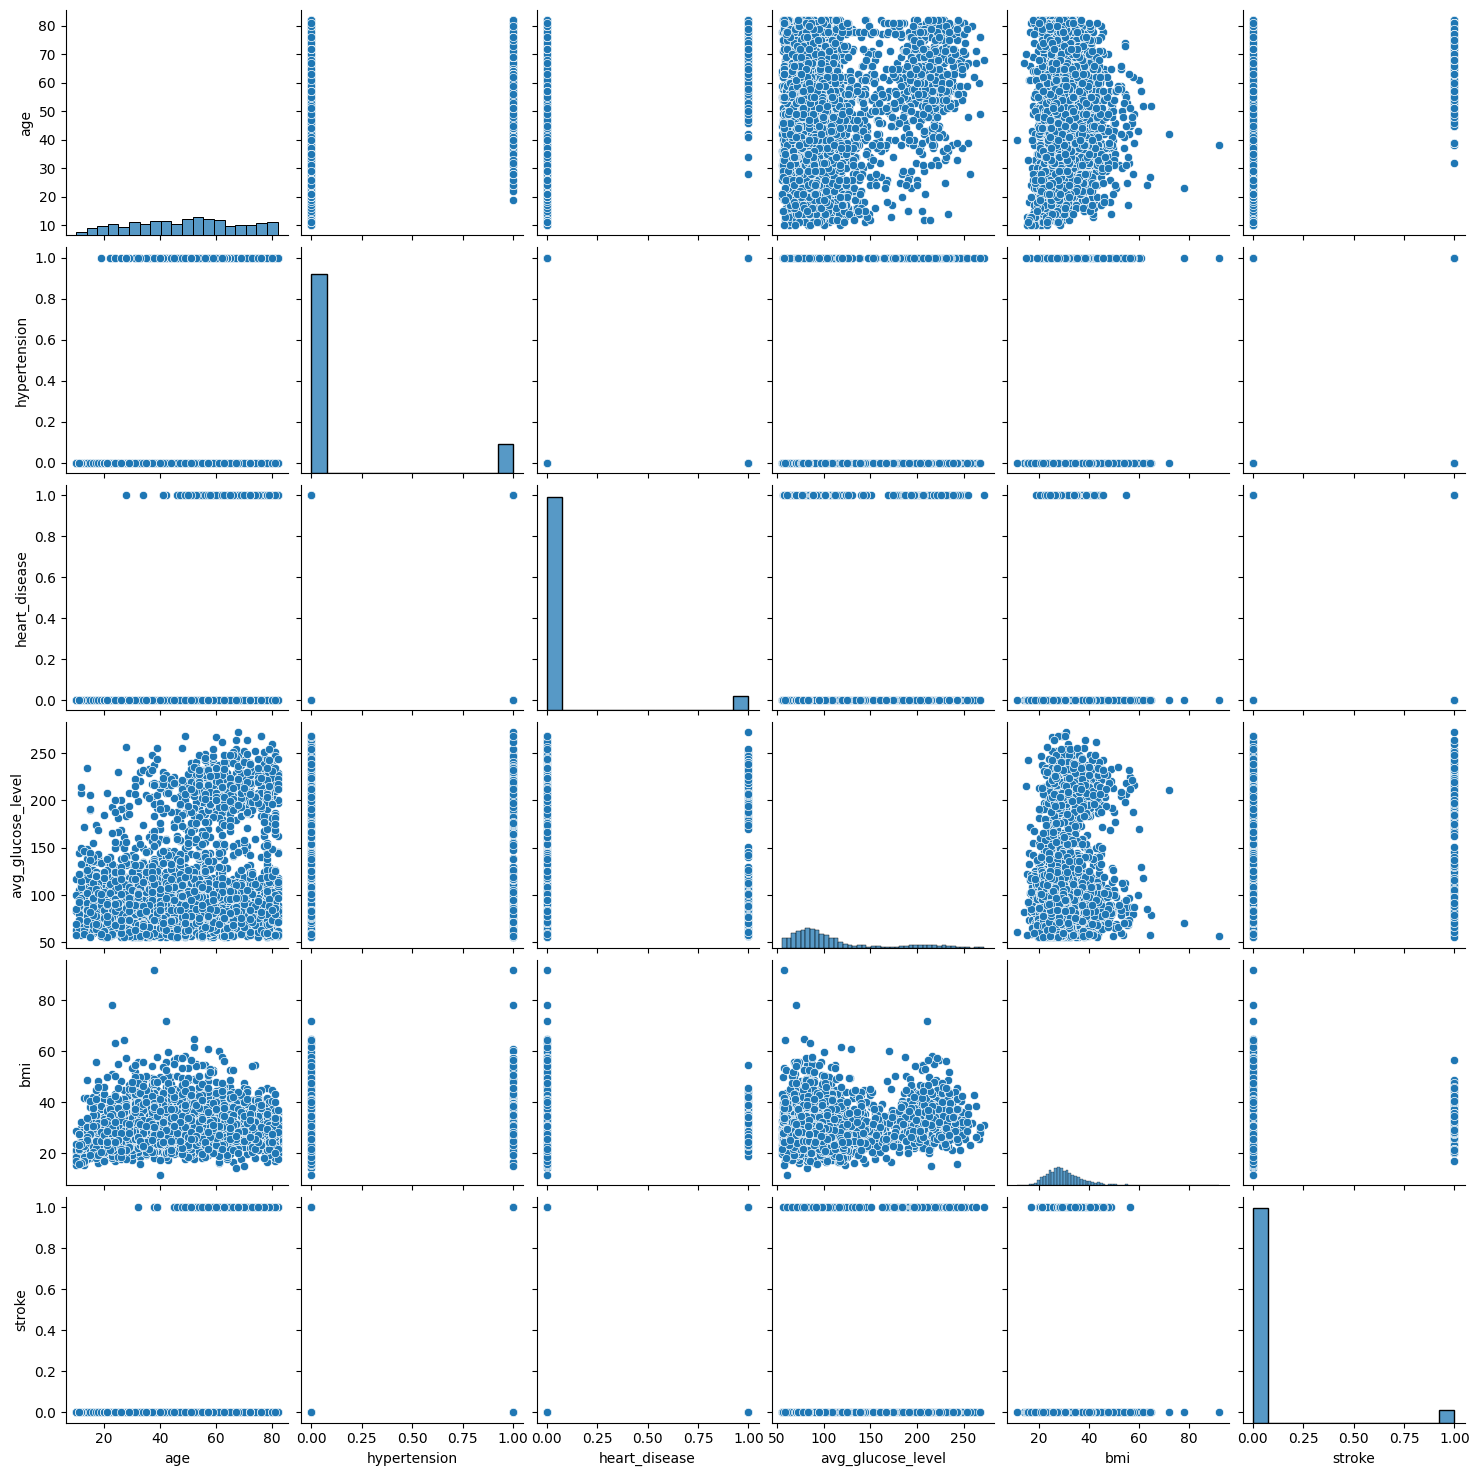

In [107]:
# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pairwise Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df[numeric_df.columns])

In [108]:
# Get correlation of all features with 'stroke'
stroke_corr = corr_matrix['stroke'].sort_values(ascending=False)
print("Correlation of features with stroke:\n")
print(stroke_corr)

Correlation of features with stroke:

stroke               1.000000
age                  0.250765
hypertension         0.134695
heart_disease        0.129330
avg_glucose_level    0.128773
bmi                  0.005762
Name: stroke, dtype: float64


### Count Plots

####Gender Distribution

/tmp/ipython-input-109-3424849614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette='pastel')


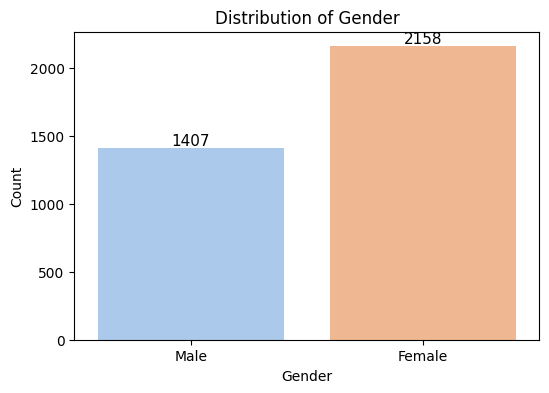

In [109]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df, palette='pastel')
# Add counts on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

####Marrige Distribution

/tmp/ipython-input-110-4276353102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ever_married', data=df, palette='pastel')


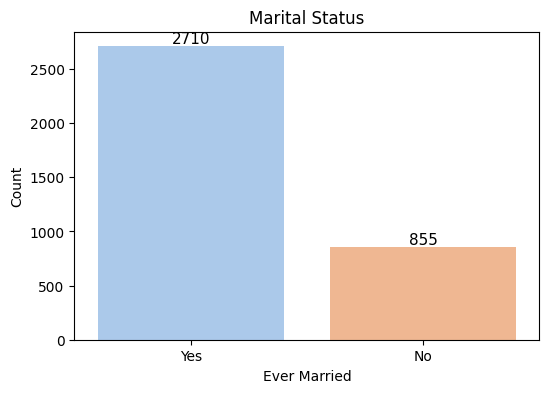

In [110]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='ever_married', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.title('Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()

####Work Type Distribution

/tmp/ipython-input-111-412573891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='work_type', data=df, palette='pastel')


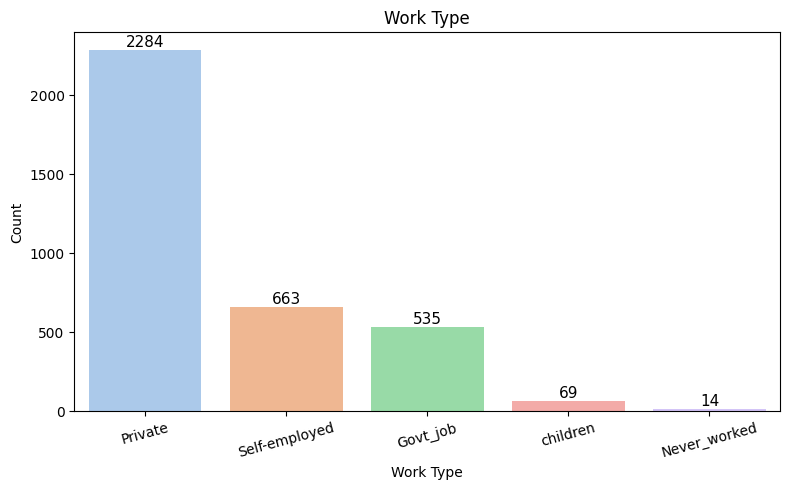

In [111]:
# Plot for 'work_type'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='work_type', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)
plt.title('Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### Residence Type Distribution

/tmp/ipython-input-112-1092845525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Residence_type', data=df, palette='pastel')


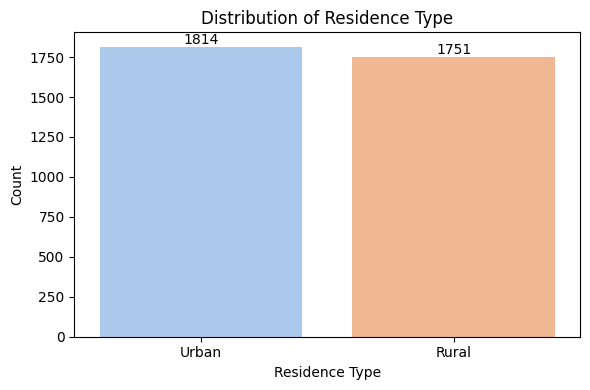

In [112]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Residence_type', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

####Hypertension Distribution

/tmp/ipython-input-113-3395013748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='hypertension', data=df, palette='pastel')


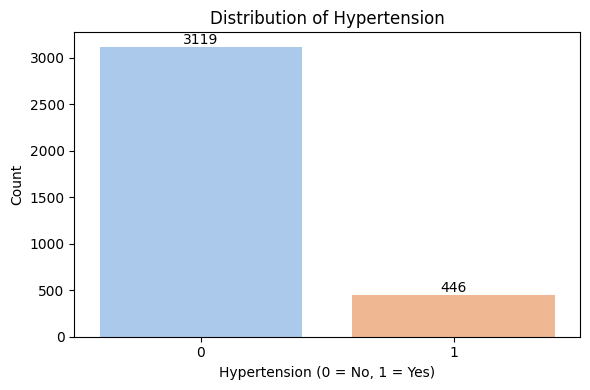

In [113]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='hypertension', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

####Heart Disease Distribution

/tmp/ipython-input-114-1327106989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='heart_disease', data=df, palette='pastel')


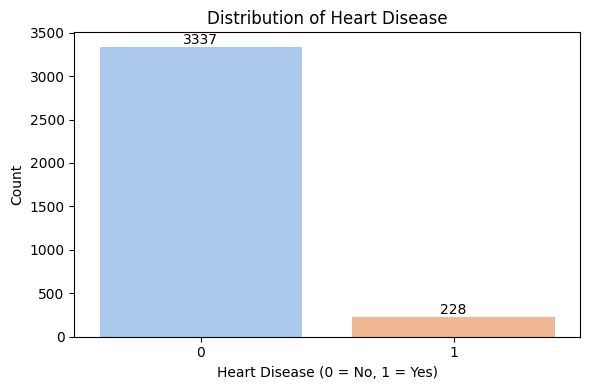

In [114]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='heart_disease', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

####Smoking Status Distribution

/tmp/ipython-input-115-3040708713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='smoking_status', data=df, palette='pastel')


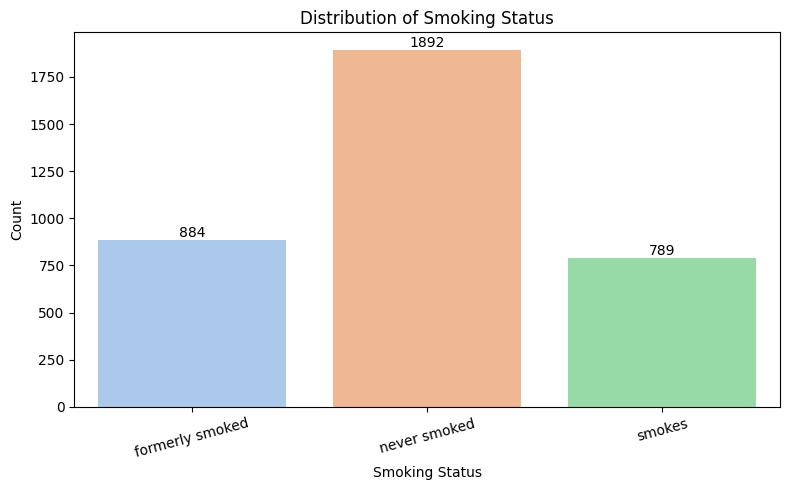

In [115]:
# Plot for 'smoking_status'
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='smoking_status', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### Stroke Distribution

/tmp/ipython-input-116-2189328092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=df, palette='pastel')


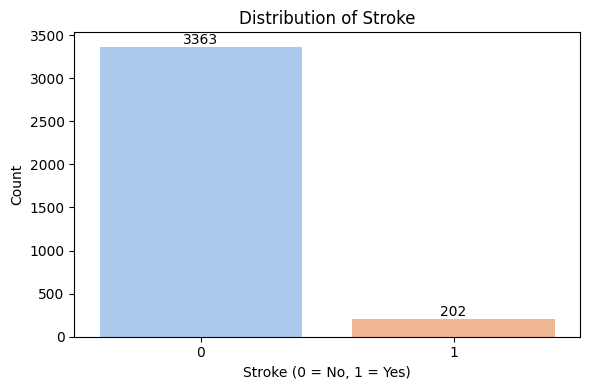

In [116]:
# Plot for 'stroke'
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='stroke', data=df, palette='pastel')
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

###Numeric Distributions

####BMI Distribution

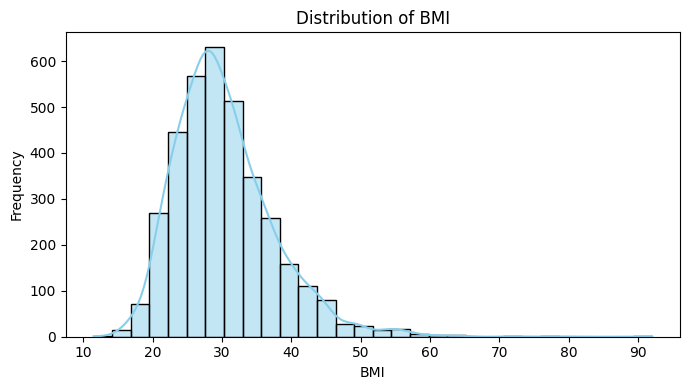

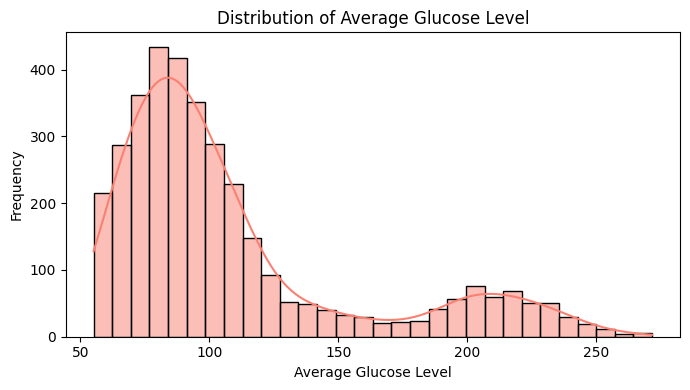

In [117]:
# Plot for BMI
plt.figure(figsize=(7, 4))
sns.histplot(df['bmi'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot for Average Glucose Level
plt.figure(figsize=(7, 4))
sns.histplot(df['avg_glucose_level'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Comparison Data Values

####Age vs. Stroke

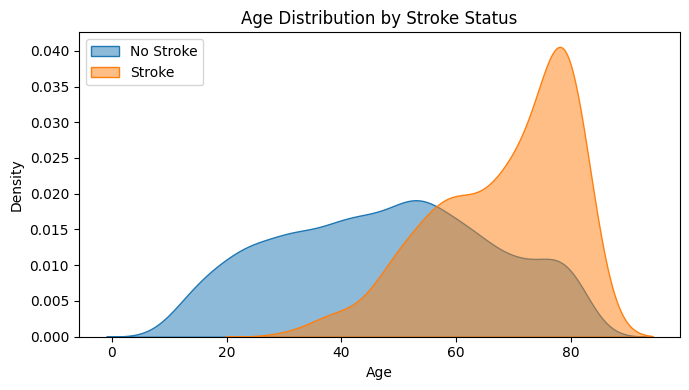

In [118]:
plt.figure(figsize=(7, 4))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', label='No Stroke', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['stroke'] == 1], x='age', label='Stroke', fill=True, alpha=0.5)
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-119-1737067464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=df, palette='pastel')


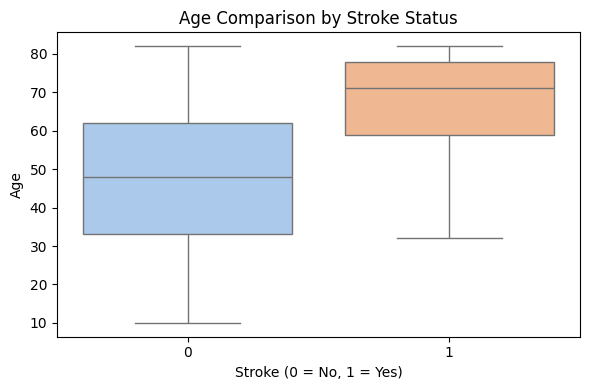

In [119]:
## Age vs. Stroke Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='age', data=df, palette='pastel')
plt.title('Age Comparison by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

####BMI vs. Stroke

/tmp/ipython-input-120-1466694943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=df, palette='pastel')


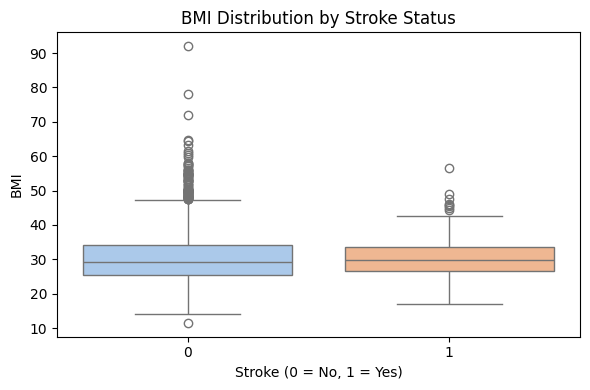

In [120]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='bmi', data=df, palette='pastel')
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

####Glucose Level vs. Stroke

/tmp/ipython-input-121-3161488743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='pastel')


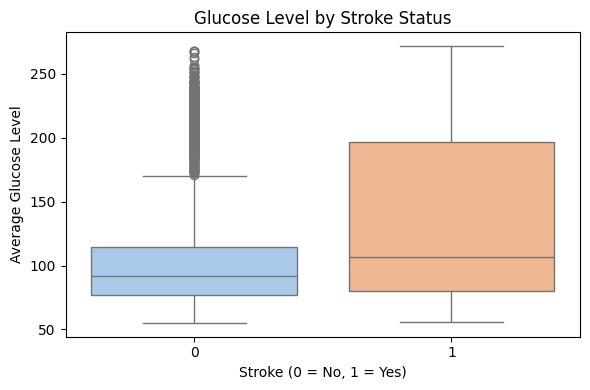

In [121]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='pastel')
plt.title('Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.tight_layout()
plt.show()

####Smoking Status vs. Stroke

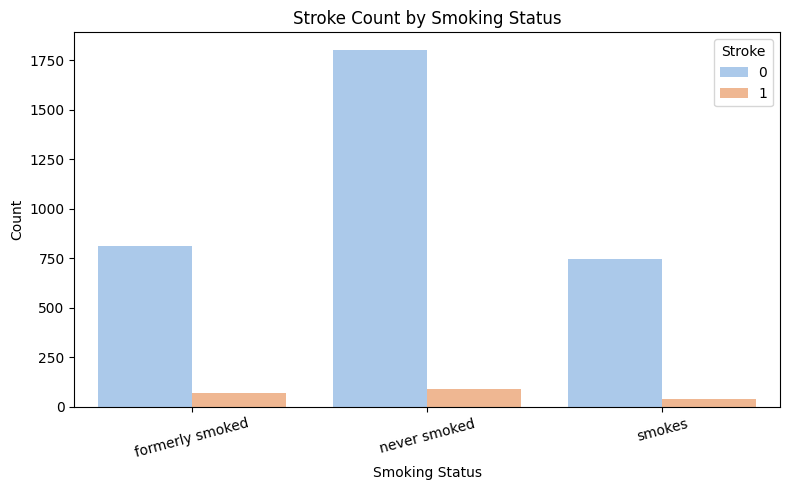

In [122]:
# Stroke Count by Smoking Status
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='pastel')
plt.title('Stroke Count by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

####Hypertension vs. Stroke

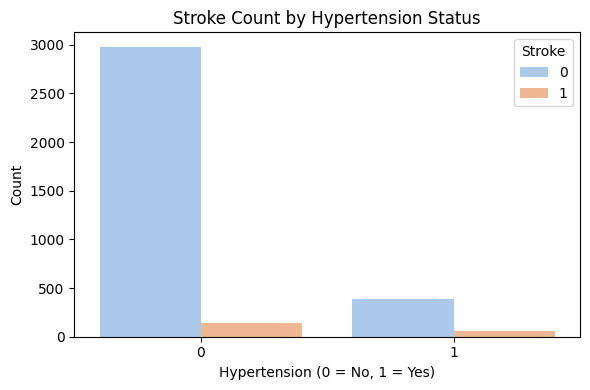

In [123]:
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='pastel')
plt.title('Stroke Count by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.tight_layout()
plt.show()

# Feature Engineering & Preprocessing

In [124]:
# Step 1: One-hot encode categorical variables
df = pd.get_dummies(df, columns=[
    'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'
], drop_first=True)

# Step 2: Scale numeric features
num_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 3: Define features (X) and target (y)
X = df.drop(columns='stroke')
y = df['stroke']

# Step 4: Train/Test split (stratified to preserve class balance in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Step 5: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", pd.Series(y_train_res).value_counts(normalize=True))

Before SMOTE: stroke
0    0.943198
1    0.056802
Name: proportion, dtype: float64
After SMOTE: stroke
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Save processed dataset to CSV
df.to_csv("processed_stroke_dataset.csv", index=False)

from google.colab import files
files.download("processed_stroke_dataset.csv")

# Model Development
##  Predictive Goal: Predict whether a patient will have a stroke based on their health, demographic, and lifestyle features.
### Target Variable: Stroke (0 = No, 1 = Yes)

### Logistic Regression

In [126]:
# Model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(lr, X_train_res, y_train_res, cv=cv, scoring=scoring)

# Display results
print("LR Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results['test_' + metric].mean():.3f}")

LR Cross-Validation Results (Mean Scores):
accuracy: 0.769
precision: 0.750
recall: 0.807
f1: 0.777
roc_auc: 0.855


### KNN

In [127]:
# model
knn = KNeighborsClassifier()

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_knn = cross_validate(knn, X_train_res, y_train_res, cv=cv, scoring=scoring)

# Print average CV scores
print("KNN Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results_knn['test_' + metric].mean():.3f}")

KNN Cross-Validation Results (Mean Scores):
accuracy: 0.870
precision: 0.805
recall: 0.976
f1: 0.882
roc_auc: 0.941


### SVM

In [128]:
# Define the SVM model
svm = SVC(probability=True, random_state=42)

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_svm = cross_validate(svm, X_train_res, y_train_res, cv=cv, scoring=scoring)

# Print average CV scores
print("SVM Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results_svm['test_' + metric].mean():.3f}")

SVM Cross-Validation Results (Mean Scores):
accuracy: 0.840
precision: 0.797
recall: 0.912
f1: 0.851
roc_auc: 0.913


### Decision Tree

In [129]:
dt = DecisionTreeClassifier(random_state=42)

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_dt = cross_validate(dt, X_train_res, y_train_res, cv=cv, scoring=scoring)

# Print average scores across folds
print("Decision Tree Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results_dt['test_' + metric].mean():.3f}")

Decision Tree Cross-Validation Results (Mean Scores):
accuracy: 0.872
precision: 0.857
recall: 0.893
f1: 0.874
roc_auc: 0.872


### Random Forest

In [130]:
rf = RandomForestClassifier(random_state=42)

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_rf = cross_validate(rf, X_train_res, y_train_res, cv=cv, scoring=scoring)

# Print average scores across folds
print("Random Forest Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results_rf['test_' + metric].mean():.3f}")


Random Forest Cross-Validation Results (Mean Scores):
accuracy: 0.933
precision: 0.911
recall: 0.958
f1: 0.934
roc_auc: 0.983


### XGBoost

In [131]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_xgb = cross_validate(xgb, X_train_res, y_train_res, cv=cv, scoring=scoring)

print("XGBoost Cross-Validation Results (Mean Scores):")
for metric in scoring:
    print(f"{metric}: {cv_results_xgb['test_' + metric].mean():.3f}")

XGBoost Cross-Validation Results (Mean Scores):
accuracy: 0.927
precision: 0.911
recall: 0.946
f1: 0.928
roc_auc: 0.981


## Tuning Hyperparameters

### KNN

In [132]:
# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for best recall
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring=scoring,
    refit='recall',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_res, y_train_res)

print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN Recall:", round(grid_knn.cv_results_['mean_test_recall'][grid_knn.best_index_], 3))
print("Accuracy at Best KNN Recall:", round(grid_knn.cv_results_['mean_test_accuracy'][grid_knn.best_index_], 3))


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Recall: 0.988
Accuracy at Best KNN Recall: 0.864


In [133]:
# Grid search for best roc auc value
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    scoring='roc_auc',
    refit='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_res, y_train_res)

# Print best parameters and scores
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN ROC-AUC:", round(grid_knn.cv_results_['mean_test_score'][grid_knn.best_index_], 3))

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN ROC-AUC: 0.959


### Random Forest

In [134]:
# Parameter grid
rf = RandomForestClassifier(random_state=0)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, 15, 30, None],
    'criterion': ['gini', 'entropy']
}

# Grid search for best recall
grid_rf = GridSearchCV(rf, param_grid=rf_param_grid, cv=5,
                       scoring=scoring, refit='recall', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Recall:", round(grid_rf.cv_results_['mean_test_recall'][grid_rf.best_index_], 3))
print("Accuracy at Best RF Recall:", round(grid_rf.cv_results_['mean_test_accuracy'][grid_rf.best_index_], 3))


Best RF Parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
Best RF Recall: 0.964
Accuracy at Best RF Recall: 0.928


In [135]:
# Grid search with ROC-AUC scoring
grid_rf = GridSearchCV(
    rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    refit='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train_res, y_train_res)

# Print best params and AUC
print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF ROC-AUC:", round(grid_rf.cv_results_['mean_test_score'][grid_rf.best_index_], 3))

Best RF Parameters: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 150}
Best RF ROC-AUC: 0.984


### XGBoost

In [136]:
# Define parameter grid
xgb_param_grid = {
      'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200]
}

# Grid search for best recall
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring=scoring,
    refit='recall',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_train_res, y_train_res)

# Output best results
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGB Recall:", round(grid_xgb.cv_results_['mean_test_recall'][grid_xgb.best_index_], 3))
print("Accuracy at Best XGB Recall:", round(grid_xgb.cv_results_['mean_test_accuracy'][grid_xgb.best_index_], 3))


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150}
Best XGB Recall: 0.958
Accuracy at Best XGB Recall: 0.939


In [137]:
# Grid search for best roc auc
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='roc_auc',
    refit='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_train_res, y_train_res)

# Output best results
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGB ROC-AUC:", round(grid_xgb.cv_results_['mean_test_score'][grid_xgb.best_index_], 3))

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best XGB ROC-AUC: 0.986


# Model Comparison & Selection

### KNN

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.84       673
           1       0.11      0.55      0.19        40

    accuracy                           0.73       713
   macro avg       0.54      0.65      0.52       713
weighted avg       0.92      0.73      0.80       713

Confusion Matrix:
 [[502 171]
 [ 18  22]]
Accuracy: 0.735
Recall: 0.55
Precision: 0.114
F1-Score: 0.189
ROC-AUC Score: 0.739


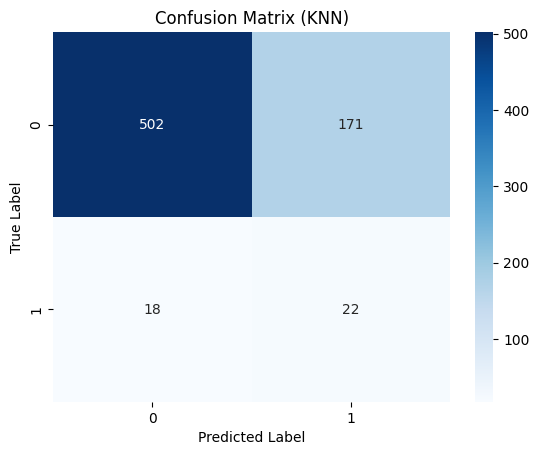

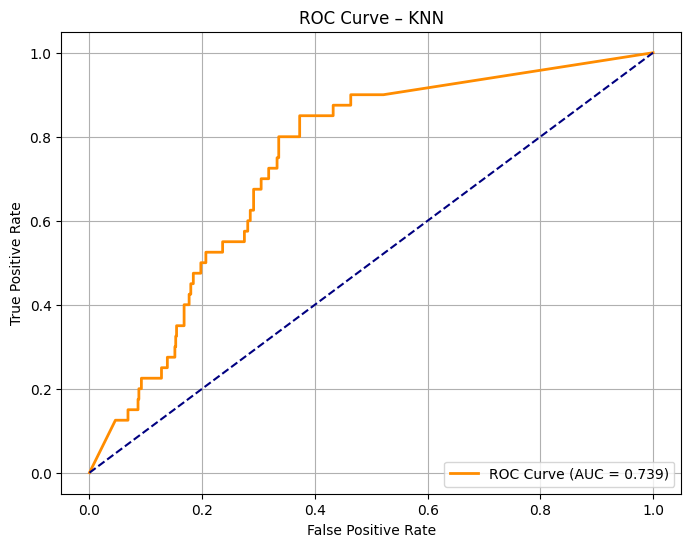

In [138]:
best_knn = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance',
    metric='manhattan'
)
best_knn.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1-Score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve – KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       673
           1       0.15      0.78      0.25        40

    accuracy                           0.74       713
   macro avg       0.57      0.76      0.55       713
weighted avg       0.94      0.74      0.81       713

Confusion Matrix:
 [[497 176]
 [  9  31]]
Accuracy: 0.741
Recall: 0.775
Precision: 0.15
F1-Score: 0.251
ROC-AUC Score: 0.813


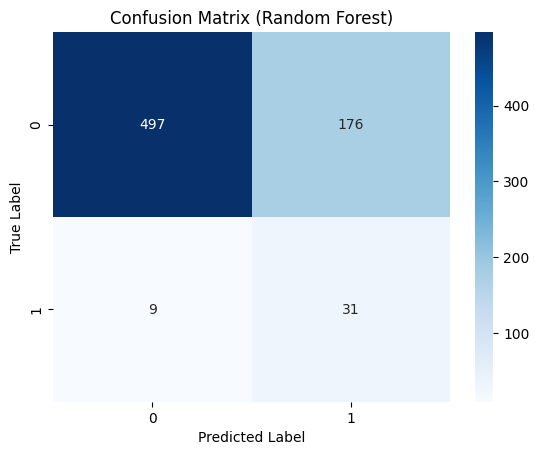

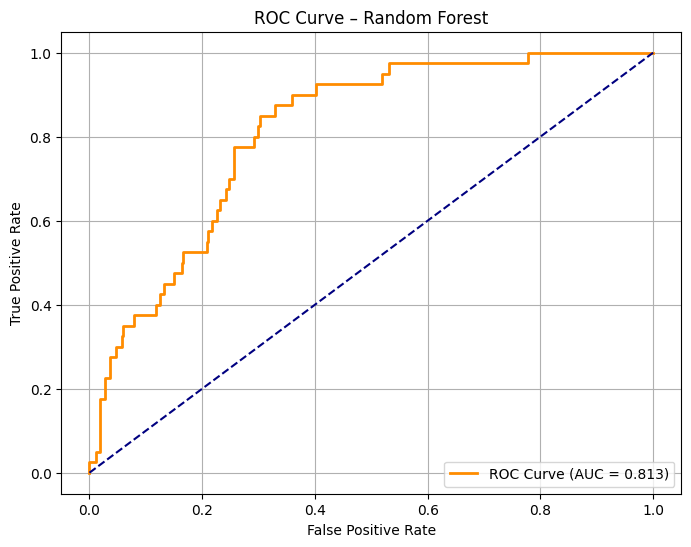

In [139]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth= 5,
    criterion='entropy',
    random_state=42
)
best_rf.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# 📊 Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1-Score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


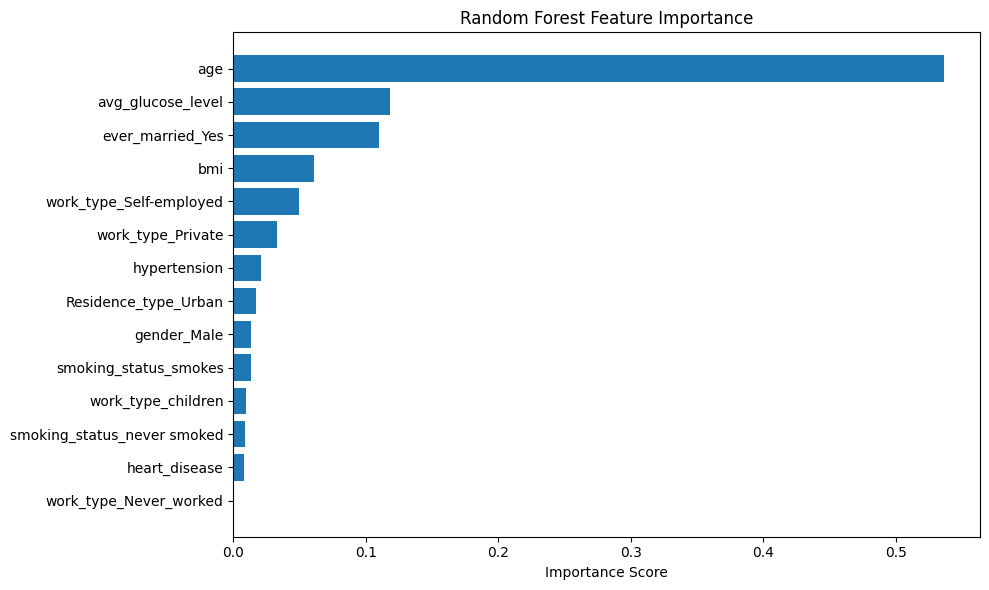

In [140]:
## Feature Importance
rf_importances = best_rf.feature_importances_
feature_names = X_train.columns

rf_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot all features
plt.figure(figsize=(10, 6))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.85       673
           1       0.15      0.78      0.25        40

    accuracy                           0.74       713
   macro avg       0.57      0.76      0.55       713
weighted avg       0.94      0.74      0.81       713

Confusion Matrix:
 [[499 174]
 [  9  31]]
Accuracy: 0.743
Recall: 0.775
Precision: 0.151
F1-Score: 0.253
ROC-AUC Score: 0.826


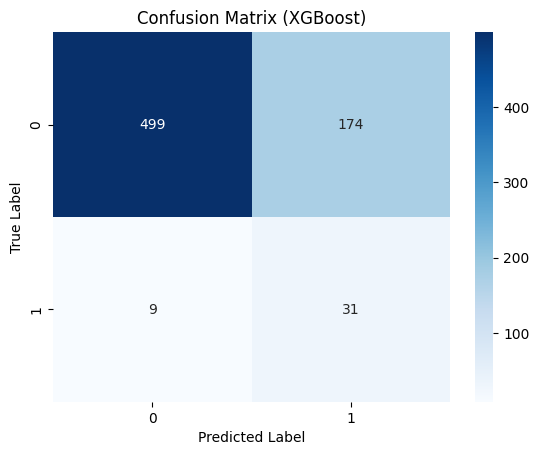

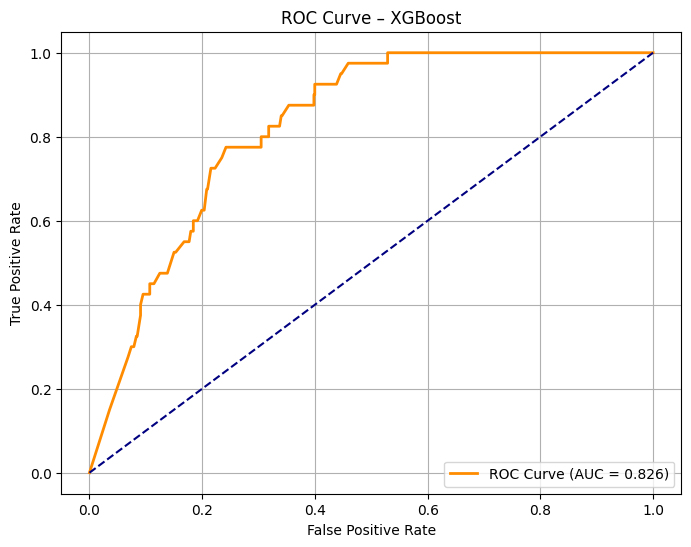

In [141]:
best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1-Score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve – XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


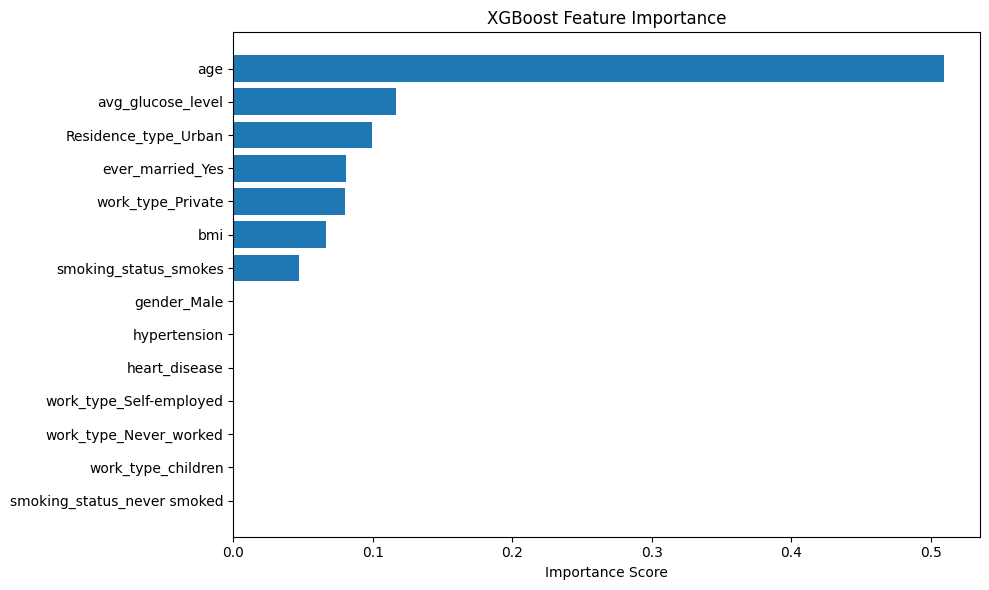

In [142]:
# feature importances
importances = best_xgb.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Show most important at the top
plt.tight_layout()
plt.show()


# Ensemble (Stacking) Model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       673
           1       0.14      0.70      0.24        40

    accuracy                           0.75       713
   macro avg       0.56      0.72      0.54       713
weighted avg       0.93      0.75      0.81       713

Confusion Matrix:
 [[504 169]
 [ 12  28]]
Accuracy: 0.746
Recall: 0.7
Precision: 0.142
F1-Score: 0.236
ROC-AUC Score: 0.801


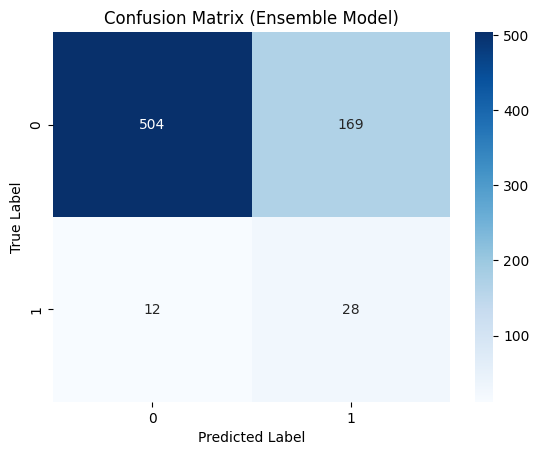

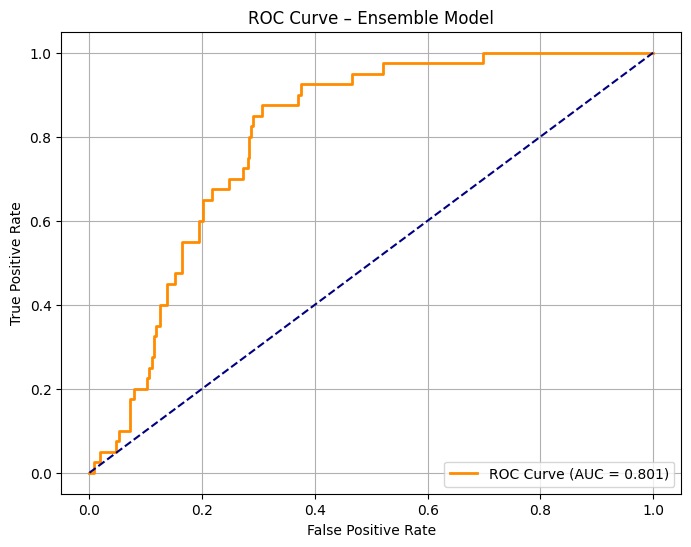

In [143]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Define Models
# K-Nearest Neighbors
best_knn = KNeighborsClassifier(
    n_neighbors= 9,
    weights='distance',
    metric='euclidean'
)

# Random Forest
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    criterion='entropy',
    random_state=42
)

# XGBoost
best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Create ensemble

# Hard Voting (for class labels) or soft Voting (for probabilities)
ensemble = VotingClassifier(
    estimators=[
        ('knn', best_knn),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'  # 'soft' uses predict_proba, which is good for ROC-AUC
)

# Fit ensemble on training data
ensemble.fit(X_train_res, y_train_res)

# Predict and evaluate
# Predictions
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("F1-Score:", round(f1_score(y_test, y_pred), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# Plot

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Ensemble Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve – Ensemble Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

